In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# url = 'https://raw.githubusercontent.com/lyakhmariya/GeekBrains_SQL/Python-Lesson_01/kc_house_data.csv'
url = 'https://raw.githubusercontent.com/lyakhmariya/GeekBrains_SQL/Python-Lesson_01/kc_house_data.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Изучите стоимости недвижимости

In [4]:
# df['Year_Sell'] = df['date'].astype(str).str[0:4:]
df['Month_Sell'] = df['date'].astype(str).str[0:4:] + "." + df['date'].astype(str).str[4:6:]
data = df.groupby('Month_Sell')['price'].agg(count='sum').reset_index().sort_values(by='Month_Sell')
data.head()


,Month_Sell,count
0,2014.05,9.690059e+08
1,2014.06,1.216445e+09
2,2014.07,1.204528e+09
3,2014.08,1.040704e+09
4,2014.09,9.388963e+08


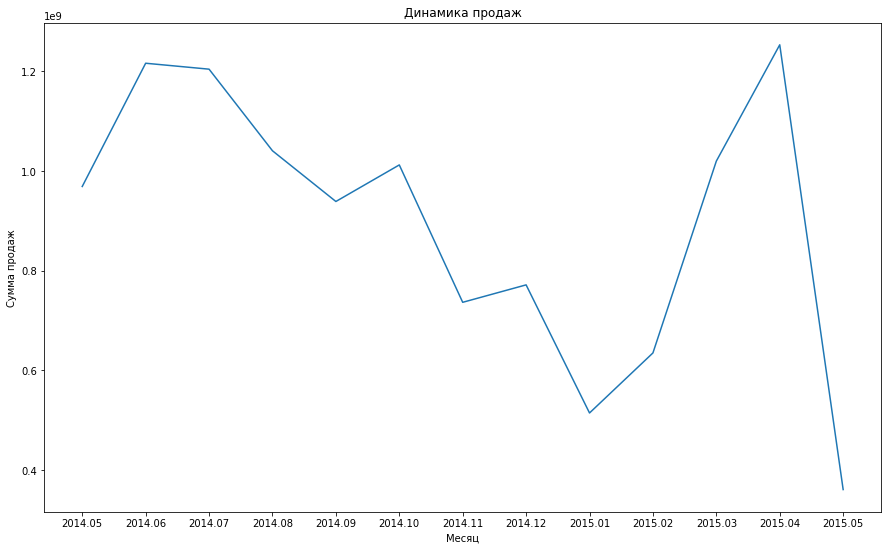

In [5]:
plt.figure(figsize=(15, 9))
plt.plot(data['Month_Sell'], data['count'])
plt.title('Динамика продаж')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж');

# Изучите распределение квадратуры жилой

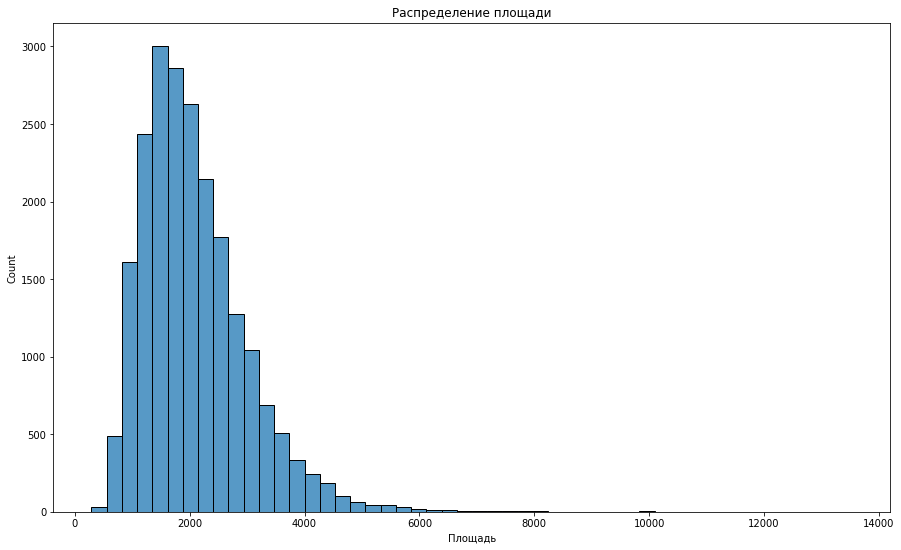

In [6]:
plt.figure(figsize=(15, 9))

sns.histplot(df['sqft_living'], bins=50)

plt.title('Распределение площади')
plt.xlabel('Площадь');

# Изучите распределение года постройки

In [7]:
data = df.groupby('yr_built')['id'].agg(count='count').reset_index().sort_values(by='yr_built')
data.head()

,yr_built,count
0,1900,87
1,1901,29
2,1902,27
3,1903,46
4,1904,45


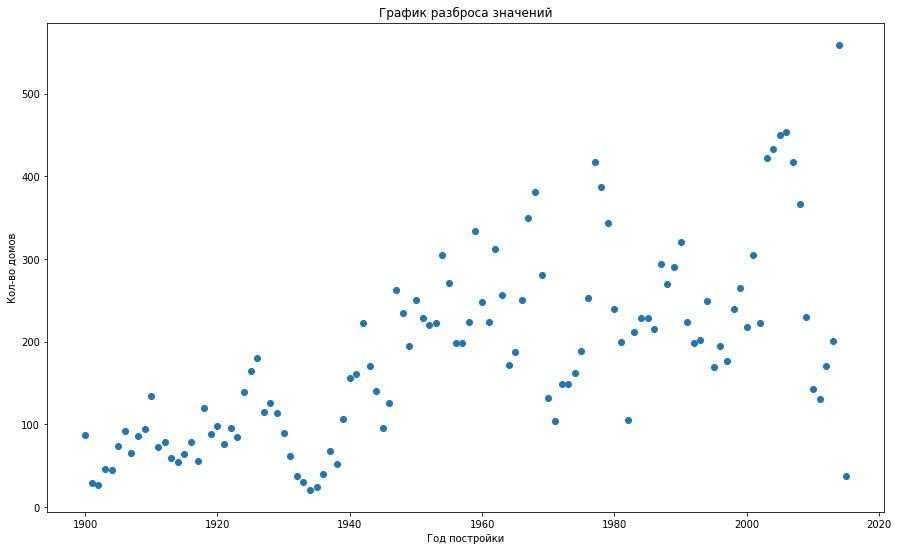

In [8]:
plt.figure(figsize=(15, 9))

plt.scatter(data['yr_built'], data['count'])

plt.title('График разброса значений')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов');

# Изучите распределение этажей домов

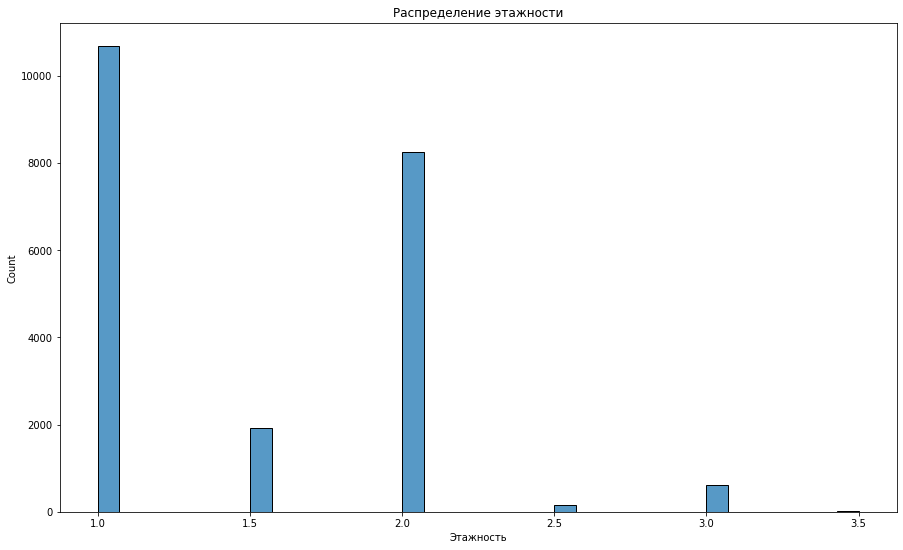

In [12]:
plt.figure(figsize=(15, 9))

sns.histplot(df['floors'])

plt.title('Распределение этажности')
plt.xlabel('Этажность');

# Изучите распределение состояния домов

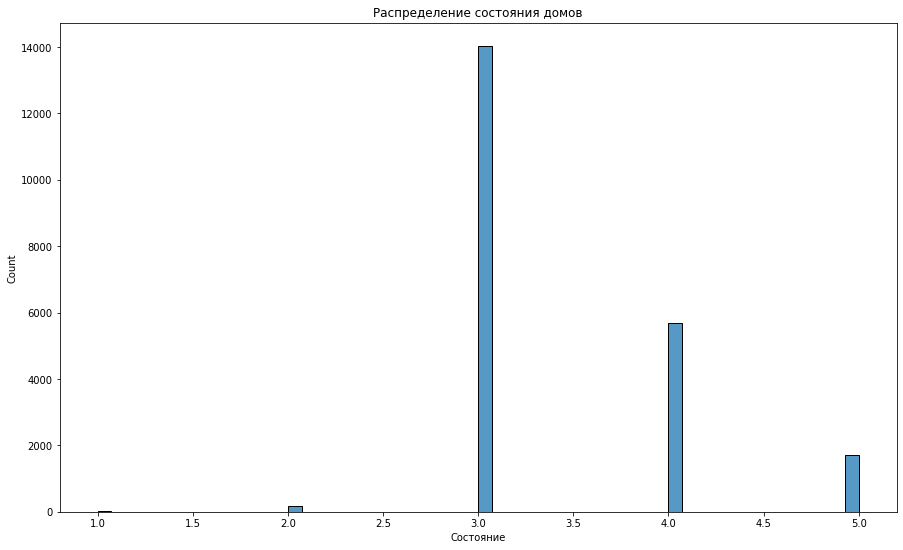

In [18]:
plt.figure(figsize=(15, 9))

sns.histplot(df['condition'])

plt.title('Распределение состояния домов')
plt.xlabel('Состояние');

# Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Если стоимость зависит от выбраного параметра, то зависимость дожна быть линейной (прямо пропорциональной или обратно пропорциональной)

Проверим гипотезу, что стоимость зависит от жилой площади

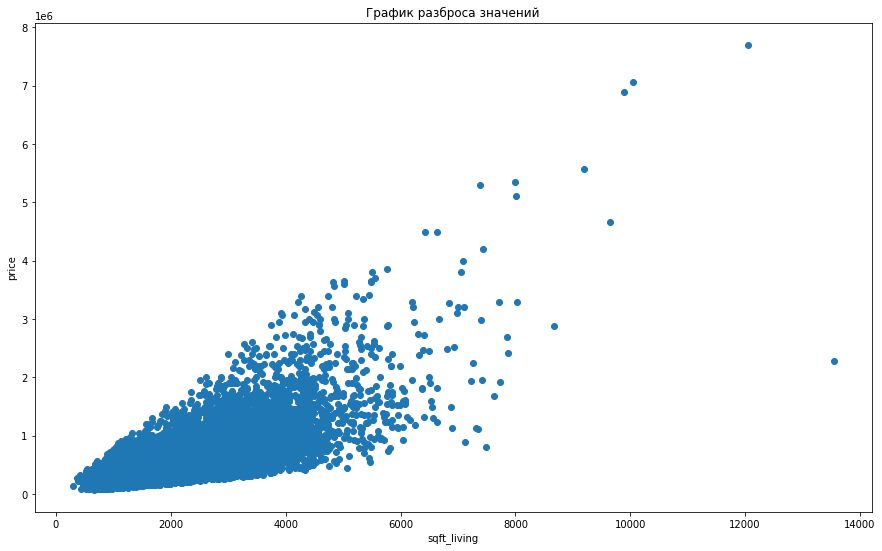

In [26]:
plt.figure(figsize=(15, 9))

plt.scatter(df['sqft_living'], df['price'])

plt.title('График разброса значений')
plt.xlabel('sqft_living')
plt.ylabel('price');

На графике мы видим прямо пропорциональную зависимость. Таким образом, чем выше площадь, тем выше стоимость

Проверим гипотезу, что стоимость зависит от оценки вида. 

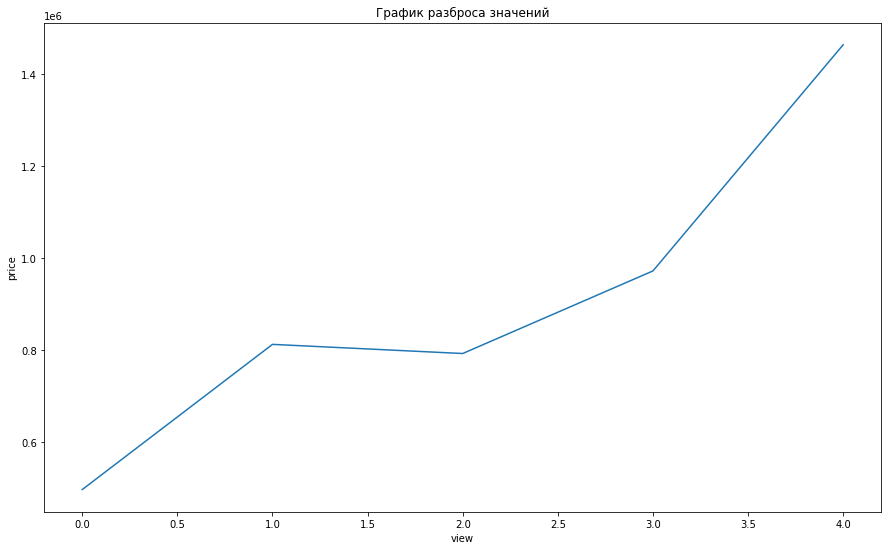

In [34]:
# data = df.groupby('view')['price'].agg(count='mean').reset_index().sort_values(by='view')
data = df.groupby('view')['price'].mean().reset_index().sort_values(by='view')

plt.figure(figsize=(15, 9))

plt.plot(data['view'], data['price'])

plt.title('График разброса значений')
plt.xlabel('view')
plt.ylabel('price');

В целом мы так же видим прямо пропорциональную зависимость оценки вида и стоимости объекта. 

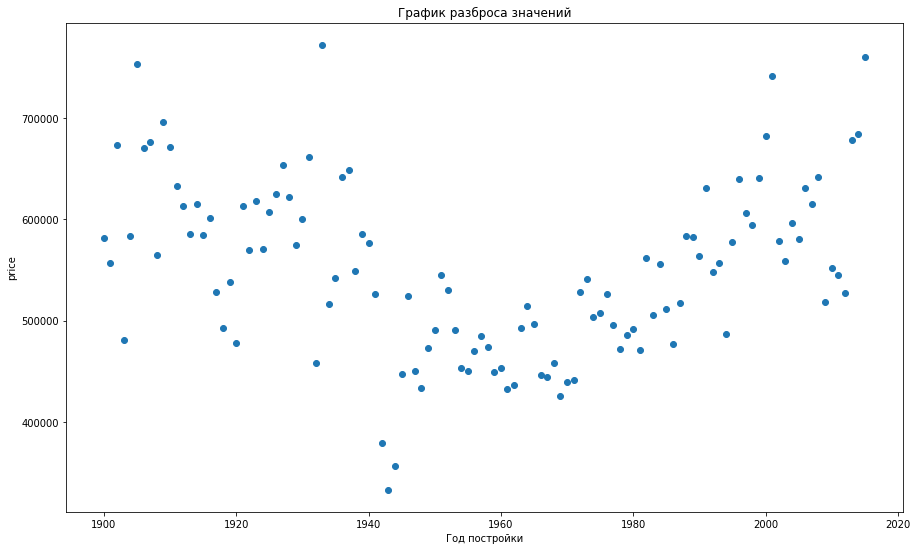

In [40]:
data = df.groupby('yr_built')['price'].mean().reset_index().sort_values(by='yr_built')
plt.figure(figsize=(15, 9))

plt.scatter(data['yr_built'], data['price'])

plt.title('График разброса значений')
plt.xlabel('Год постройки')
plt.ylabel('price');

Складывается ощущение, что более старые дома стоят дороже. Возможно, они исторические. Посередине выори (1960 год) самые дешевые. А новее опять же дороже.

Возможно, дело в том, что старые дома реставрировали? Давайте посмотрим то же распределение, но с учетом даты реновации

In [50]:
df['yr'] = np.where(df['yr_renovated'] == 0, df['yr_built'], df['yr_renovated'])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,above_basement,yr
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,1,1955
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2,1991
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,1,1933
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2,1965
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,1,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,1,2009
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,1,2014
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,1,2009
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,2004


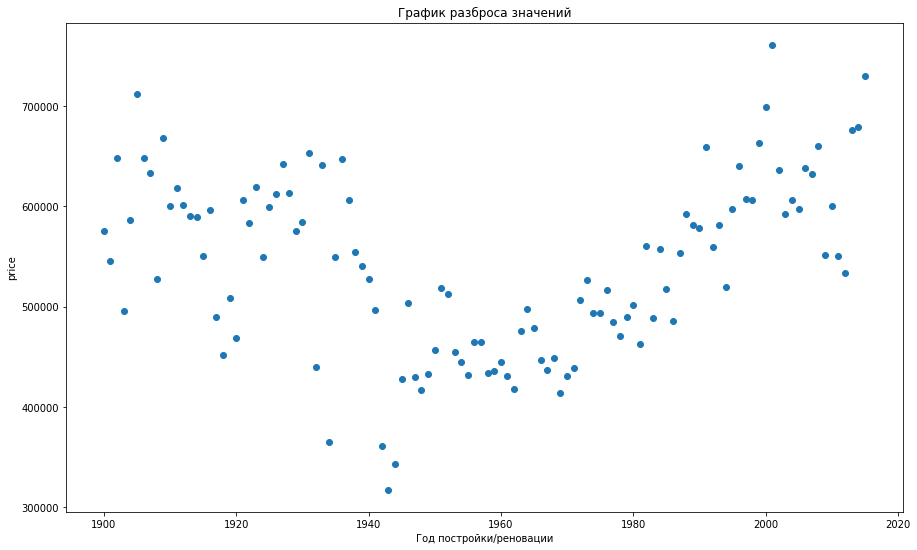

In [51]:
data = df.groupby('yr')['price'].mean().reset_index().sort_values(by='yr')
plt.figure(figsize=(15, 9))

plt.scatter(data['yr'], data['price'])

plt.title('График разброса значений')
plt.xlabel('Год постройки/реновации')
plt.ylabel('price');

Пожалуй, ничего нового. Вывод тот же. Исторические и новые дома стоят дороже средних (1960)

Ранее мы выяснили, что цена зависит от общей площади. Но зависит ли она от площади чердака в частности?

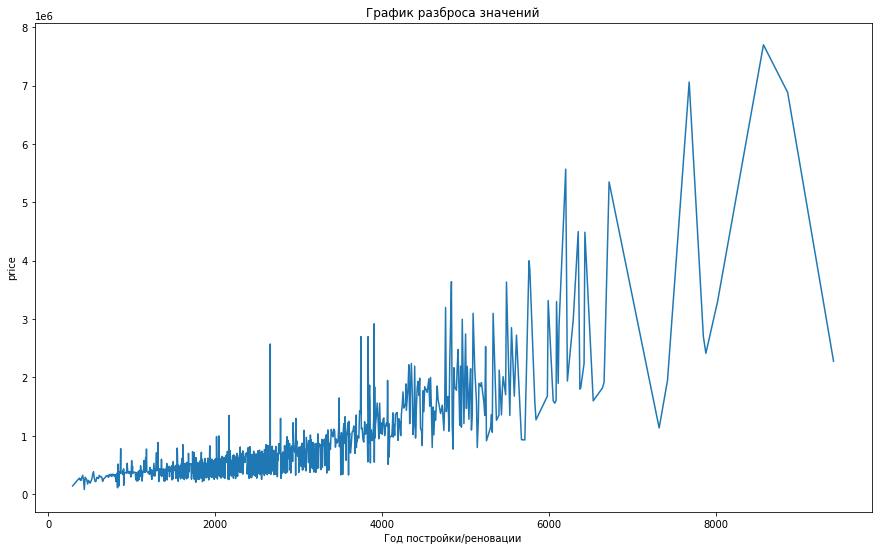

In [58]:
data = df.groupby('sqft_above')['price'].mean().reset_index().sort_values(by='sqft_above')
plt.figure(figsize=(15, 9))

plt.plot(data['sqft_above'], data['price'])

plt.title('График разброса значений')
plt.xlabel('Год постройки/реновации')
plt.ylabel('price');

Да, думаю, очевидно, что зависит